In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas_profiling as pp
%matplotlib inline

In [2]:
master_datafile = pd.read_csv("/Users/jenniferwu/Documents/NBA_Social_Influence/final_master_data_file.csv")


In [3]:
master_datafile.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
print(master_datafile.shape)
master_datafile.head()

(428, 41)


,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,SALARY,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,26500000.0,OKC,81,34.6,6.74,-0.47,6.27,17.34,2130.5,559.0
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,26500000.0,HOU,81,36.4,6.38,-1.57,4.81,15.54,969.0,321.5
2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,22116750.0,NO,75,36.1,0.45,3.90,4.35,12.81,368.0,104.0
3,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,1.7,...,NaN,TOR,74,35.4,2.21,-2.04,0.17,5.46,0.0,186.0
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,16957900.0,NO/SAC,72,34.2,3.56,0.64,4.20,11.26,102.0,91.5


In [5]:
master_datafile.describe()

,Rk,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,PACE,SALARY,GP,MPG,ORPM,DRPM,RPM,WINS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,399.000000,428.000000,...,428.000000,3.260000e+02,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,289.000000,289.000000
mean,234.399533,26.308411,20.458645,3.244860,7.158879,0.445507,0.780841,2.221262,0.299271,2.464486,...,98.330514,7.421060e+06,56.584112,20.458879,-0.842290,0.013598,-0.828692,2.578458,202.198962,79.558824
std,138.353996,4.388427,8.924219,2.153326,4.531171,0.089636,0.754010,1.947205,0.135169,1.810314,...,3.005900,6.571512e+06,22.796420,8.924329,1.961785,1.542530,2.446892,3.692751,929.866221,304.624464
min,1.000000,19.000000,2.200000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,85.920000,5.767200e+04,1.000000,2.200000,-4.430000,-3.920000,-6.600000,-2.320000,0.000000,0.000000
25%,115.750000,23.000000,13.950000,1.675000,3.800000,0.402000,0.200000,0.600000,0.269500,1.100000,...,96.697500,2.227920e+06,40.000000,13.950000,-2.232500,-1.040000,-2.440000,0.080000,3.000000,7.000000
50%,228.500000,26.000000,20.050000,2.750000,6.100000,0.443000,0.600000,1.800000,0.333000,2.000000,...,98.135000,5.000000e+06,65.000000,20.050000,-1.275000,-0.130000,-1.240000,1.150000,21.000000,14.000000
75%,350.750000,29.000000,27.450000,4.400000,9.400000,0.487000,1.300000,3.500000,0.372000,3.425000,...,100.112500,1.120770e+07,75.000000,27.450000,0.090000,1.000000,0.555000,3.950000,67.000000,43.000000
max,484.000000,40.000000,37.800000,10.300000,24.000000,0.750000,4.100000,10.000000,1.000000,9.700000,...,109.870000,3.096345e+07,82.000000,37.800000,7.270000,6.020000,8.420000,20.430000,12278.000000,2941.000000


In [6]:
master_datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 41 columns):
Rk                        428 non-null int64
PLAYER                    428 non-null object
POSITION                  428 non-null object
AGE                       428 non-null int64
MP                        428 non-null float64
FG                        428 non-null float64
FGA                       428 non-null float64
FG%                       428 non-null float64
3P                        428 non-null float64
3PA                       428 non-null float64
3P%                       399 non-null float64
2P                        428 non-null float64
2PA                       428 non-null float64
2P%                       428 non-null float64
eFG%                      428 non-null float64
FT                        428 non-null float64
FTA                       428 non-null float64
FT%                       421 non-null float64
ORB                       428 non-null float64
DRB     

In [7]:
master_datafile_na_omit = master_datafile.dropna()
master_datafile_na_omit.shape

(228, 41)

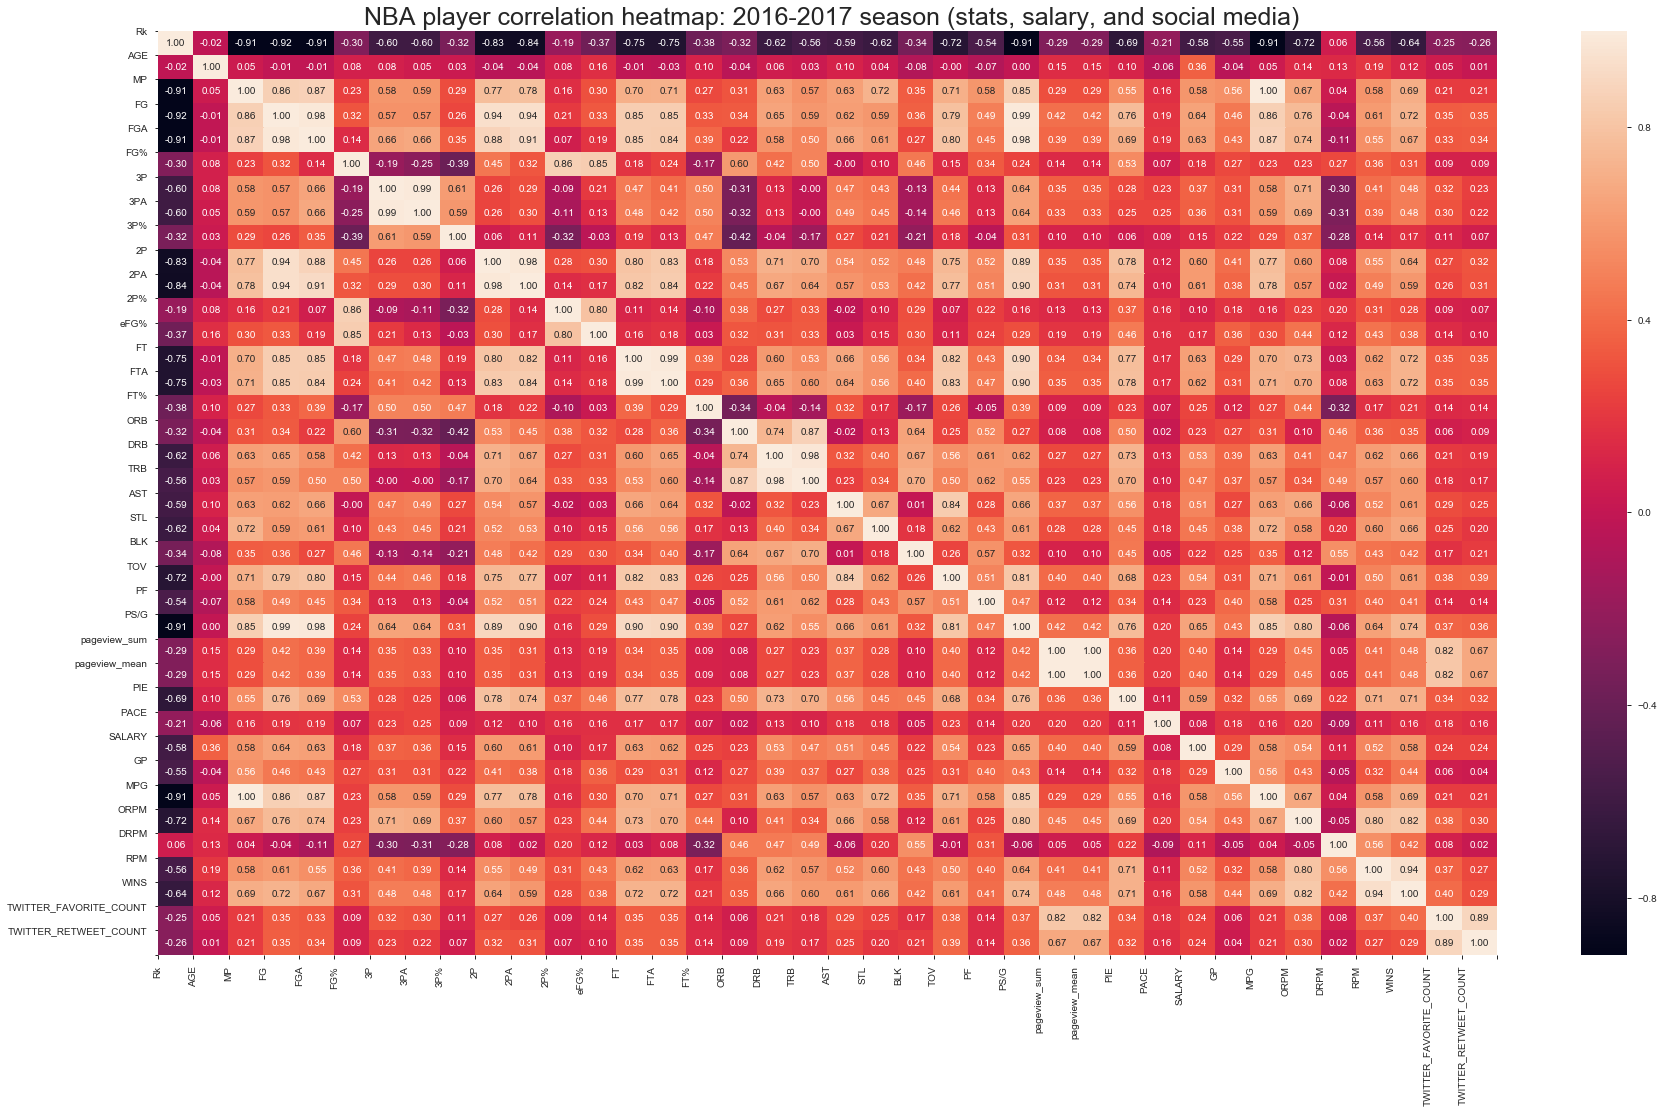

In [37]:
corr = master_datafile_na_omit.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(30, 17))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)+1), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)+1), corr.columns)
plt.title(" NBA player correlation heatmap: 2016-2017 season (stats, salary, and social media)", size = 25)
#show plot
plt.show()

## Findings =
- Both Twitter RT and FAV counts have strong positive association with Wikipedia Pageviews
- Wins have strong positive correlation with RPM, ORPM, PS/G, FG, FT, FTA, PIE


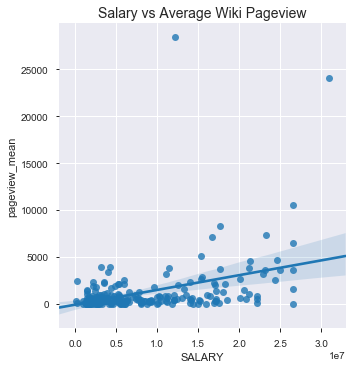

In [8]:
sns.lmplot(x="SALARY", y="pageview_mean", data=master_datafile_na_omit)
plt.title("Salary vs Average Wiki Pageview", size = 14)
plt.show()

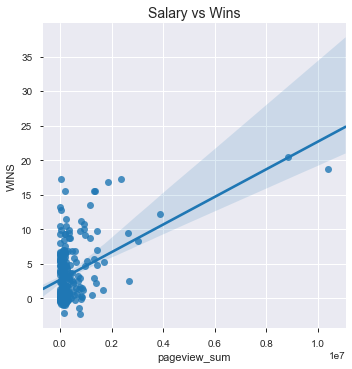

In [11]:
sns.lmplot(x="pageview_sum", y="WINS", data=master_datafile_na_omit)
plt.title("Salary vs Wins", size = 14)
plt.show()

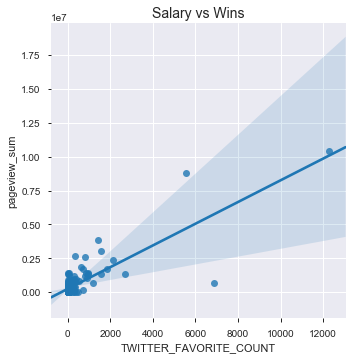

In [16]:
sns.lmplot(x="TWITTER_FAVORITE_COUNT", y="pageview_sum", data=master_datafile_na_omit)
plt.title("Salary vs Wins", size = 14)
plt.show()

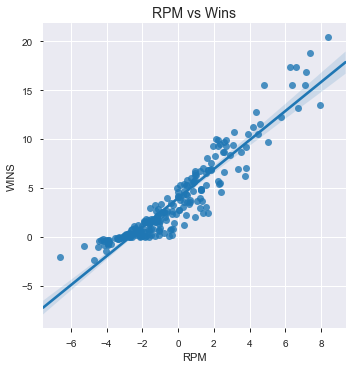

In [39]:
sns.lmplot(x="RPM", y="WINS", data=master_datafile_na_omit)
plt.title("RPM vs Wins", size = 14)
plt.show()

In [40]:
master_datafile.profile_report()

In [42]:
master_datafile.columns

Index(['Rk', 'PLAYER', 'POSITION', 'AGE', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PS/G', 'pageview_sum',
       'pageview_mean', 'PIE', 'PACE', 'SALARY', 'TEAM', 'GP', 'MPG', 'ORPM',
       'DRPM', 'RPM', 'WINS', 'TWITTER_FAVORITE_COUNT',
       'TWITTER_RETWEET_COUNT'],
      dtype='object')

In [14]:
social_med_team = master_datafile.groupby(['TEAM'], as_index=False).agg({'pageview_sum':'sum',
                                                     'TWITTER_FAVORITE_COUNT':'sum',
                                                     'TWITTER_RETWEET_COUNT':'sum'})

In [15]:
social_med_team.to_csv('/Users/jenniferwu/Documents/NBA_Social_Influence/dataset/social_med_team.csv',index=False)